In [55]:
import numpy as np
from ultralytics import SAM


model = SAM("sam2.1_b.pt")

100%|██████████| 154M/154M [00:08<00:00, 18.2MB/s] 


In [23]:
img_path = "../../data/processed/meatballs/images/train/frame_000000.PNG"

In [24]:
results = model(source=img_path)

image 1/1 c:\Users\GustavToft\OneDrive\Skrivebord\DTU\4_Semester_AS\Master_Thesis\auto-annotation-sam\notebooks\..\..\data\processed\meatballs\images\train\frame_000000.PNG: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 124418.6ms
Speed: 91.5ms preprocess, 124418.6ms inference, 15.1ms postprocess per image at shape (1, 3, 1024, 1024)


In [25]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14'}
obb: None
orig_img: array([[[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [20, 22, 24],
        [20, 22, 24],
        [20, 22, 24]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [20, 22, 24],
        [20, 22, 24],
        [20, 22, 24]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [20, 22, 24],
        [20, 22, 24],
        [20, 22, 24]],

       ...,

       [[80, 75, 67],
        [80, 75, 67],
        [80, 75, 67],
        ...,
        [98, 91, 83],
        [98, 91, 83],
        [98, 91, 83]],

       [[80, 75, 67],
        [80, 75, 67],
        [80, 75, 67],
    

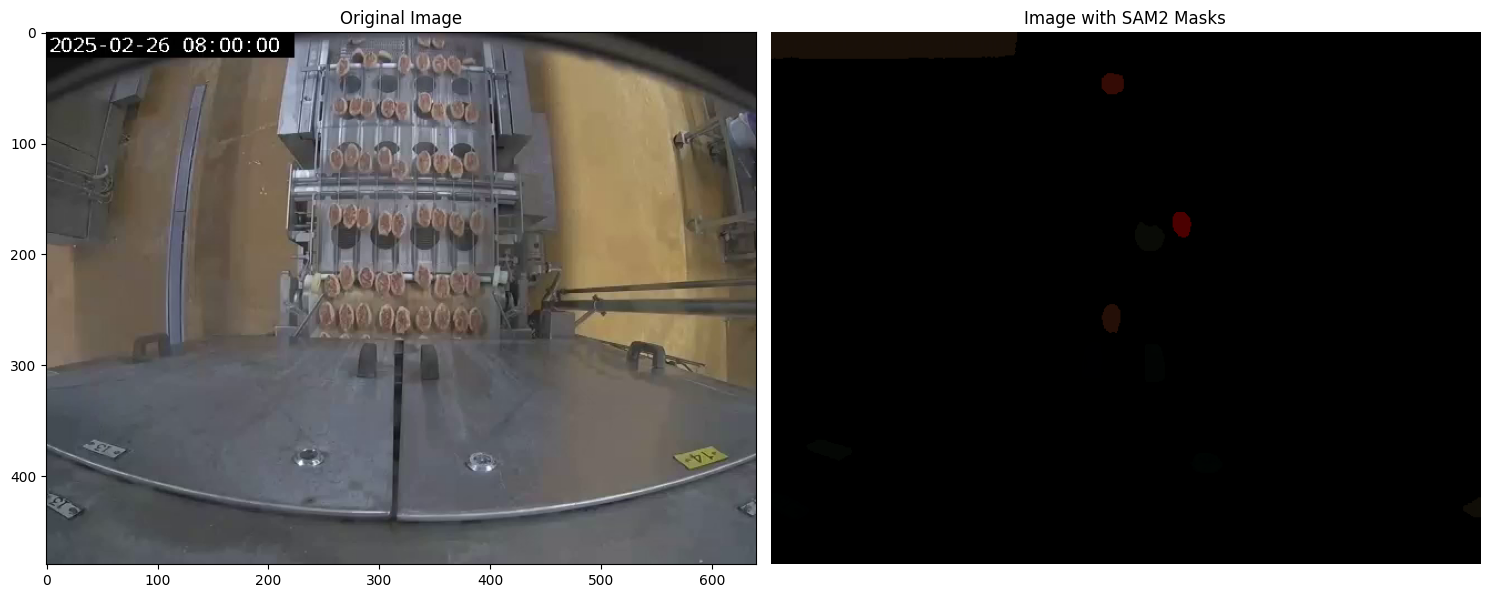

In [39]:
# Read the image for plotting
import matplotlib.pyplot as plt

img = plt.imread(img_path)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot original image
ax1.imshow(img)
ax1.set_title('Original Image')

# Plot image with masks
ax2.imshow(img)

# Color palette for masks
colors = plt.cm.rainbow(np.linspace(0, 1, len(results[0].masks)))

# Overlay masks
for result in results:
    masks = result.masks
    
    if masks is not None:
        for i, mask in enumerate(masks.data):
            # Convert mask to numpy array
            mask_np = mask.cpu().numpy()
            
            # Create colored mask
            color_mask = np.zeros(img.shape, dtype=np.float32)
            color_mask[mask_np] = colors[i][:3]
            
            # Plot mask with transparency
            ax2.imshow(color_mask, alpha=0.3)

ax2.set_title('Image with SAM2 Masks')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [38]:
# Print image details
print("Image path:", img_path)
img = plt.imread(img_path)
print("Image shape:", img.shape)
print("Image dtype:", img.dtype)
print("Image min/max:", img.min(), img.max())

# Print results details
for result in results:
    masks = result.masks
    if masks is not None:
        print("Number of masks:", len(masks))
        for i, mask in enumerate(masks.data):
            mask_np = mask.cpu().numpy()
            print(f"Mask {i} shape:", mask_np.shape)
            print(f"Mask {i} dtype:", mask_np.dtype)
            print(f"Mask {i} min/max:", mask_np.min(), mask_np.max())

Image path: ../../data/processed/meatballs/images/train/frame_000000.PNG
Image shape: (480, 640, 3)
Image dtype: float32
Image min/max: 0.0 1.0
Number of masks: 15
Mask 0 shape: (480, 640)
Mask 0 dtype: bool
Mask 0 min/max: False True
Mask 1 shape: (480, 640)
Mask 1 dtype: bool
Mask 1 min/max: False True
Mask 2 shape: (480, 640)
Mask 2 dtype: bool
Mask 2 min/max: False True
Mask 3 shape: (480, 640)
Mask 3 dtype: bool
Mask 3 min/max: False True
Mask 4 shape: (480, 640)
Mask 4 dtype: bool
Mask 4 min/max: False True
Mask 5 shape: (480, 640)
Mask 5 dtype: bool
Mask 5 min/max: False True
Mask 6 shape: (480, 640)
Mask 6 dtype: bool
Mask 6 min/max: False True
Mask 7 shape: (480, 640)
Mask 7 dtype: bool
Mask 7 min/max: False True
Mask 8 shape: (480, 640)
Mask 8 dtype: bool
Mask 8 min/max: False True
Mask 9 shape: (480, 640)
Mask 9 dtype: bool
Mask 9 min/max: False True
Mask 10 shape: (480, 640)
Mask 10 dtype: bool
Mask 10 min/max: False True
Mask 11 shape: (480, 640)
Mask 11 dtype: bool
Mask 1

(np.float64(-0.5), np.float64(249.5), np.float64(289.5), np.float64(-0.5))

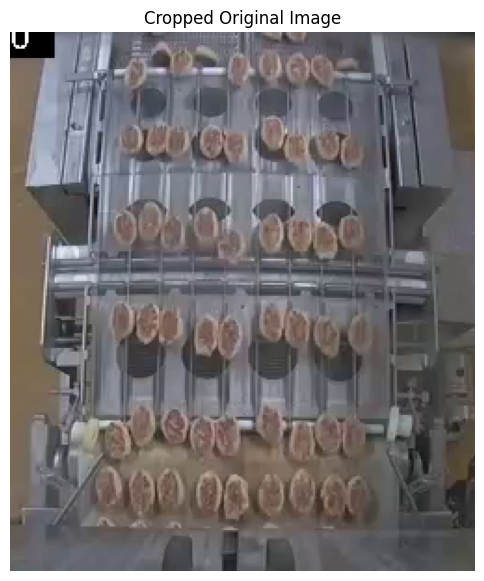

In [ ]:
cropped_img = img[10:300, 200:450]

plt.imsave("cropframe.jpg")
# Create figure
fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))

# Plot cropped original image
ax1.imshow(cropped_img)
ax1.set_title('Cropped Original Image')
ax1.axis('off')

In [50]:
result_crop = model("cropframe.jpg")

0: 1024x1024 1 0, 211673.3ms
Speed: 72.0ms preprocess, 211673.3ms inference, 4.6ms postprocess per image at shape (1, 3, 1024, 1024)


In [48]:
print(result_crop)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0', 1: '1'}
obb: None
orig_img: array([[[0.        , 0.        , 0.        ],
        [0.9843137 , 0.9843137 , 0.9843137 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        ...,
        [0.19215687, 0.18431373, 0.1882353 ],
        [0.1882353 , 0.18039216, 0.17254902],
        [0.1882353 , 0.18039216, 0.17254902]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9607843 , 0.9607843 , 0.9607843 ],
        ...,
        [0.22745098, 0.21960784, 0.22352941],
        [0.21960784, 0.21176471, 0.20392157],
        [0.21568628, 0.20784314, 0.2       ]],

       [[0.00784314, 0.00784314, 0.00784314],
        [1.        , 1.        , 1.        ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.27450982, 0.26666668, 0.25882354],
      

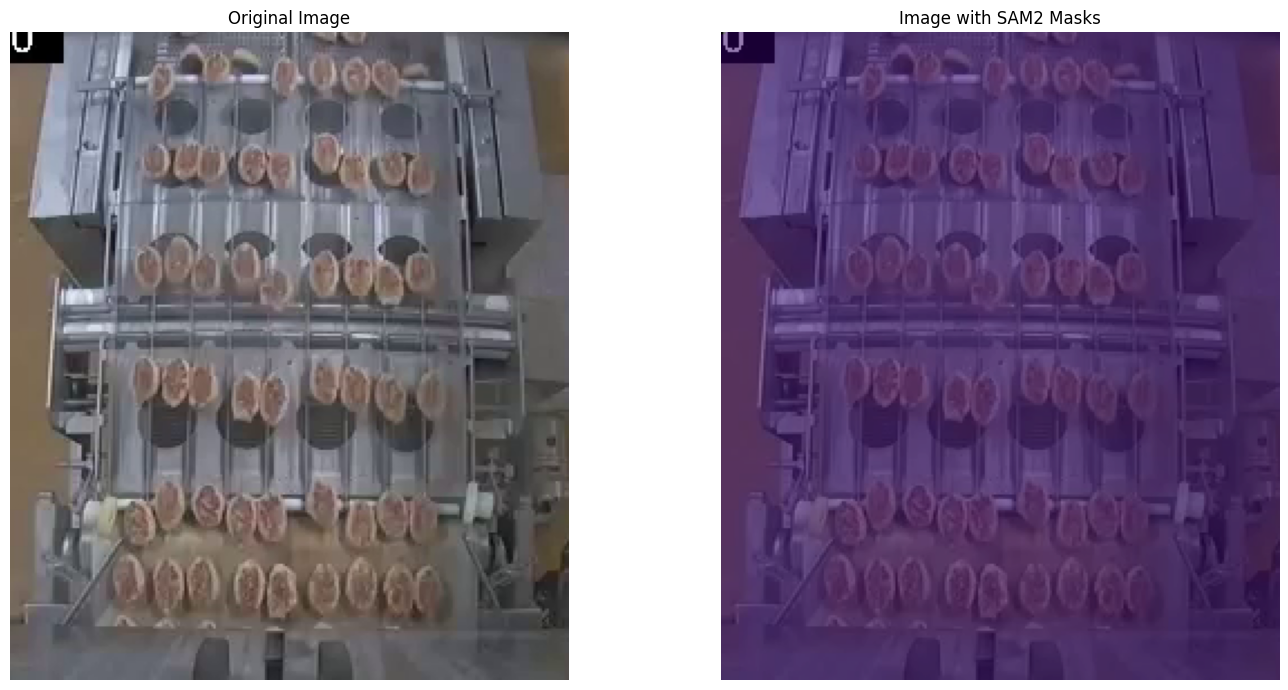

In [47]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.imshow(cropped_img)
ax1.set_title('Original Image')
ax1.axis('off')


ax2.imshow(cropped_img)

# Color palette for masks
colors = plt.cm.rainbow(np.linspace(0, 1, len(results[0].masks)))

for result in result_crop:
    masks = result.masks
    
    if masks is not None:
        for i, mask in enumerate(masks.data):
            # Convert mask to numpy array
            mask_np = mask.cpu().numpy()
            
            # Create colored mask
            color_mask = np.zeros(cropped_img.shape, dtype=np.float32)
            color_mask[mask_np] = colors[i][:3]
            
            # Plot mask with transparency
            ax2.imshow(color_mask, alpha=0.3)

ax2.set_title('Image with SAM2 Masks')
ax2.axis('off')

plt.tight_layout()
plt.show()

# samv2 package

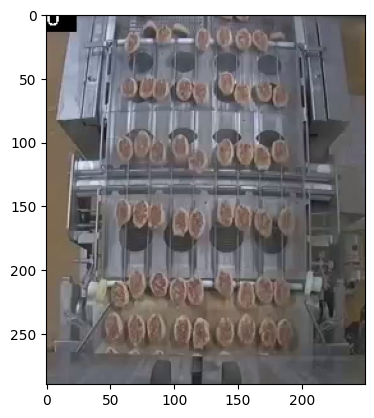

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image

img_path = "../../data/processed/meatballs/images/train/frame_000000.PNG"

img = Image.open(img_path)
img = np.array(img.convert("RGB"))

img = img[10:300, 200:450]

plt.imshow(img)

In [89]:
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator
from sam2.build_sam import build_sam2
from sam2.utils.misc import variant_to_config_mapping
from sam2.utils.visualization import show_masks

model = build_sam2(
    variant_to_config_mapping["base_plus"],
    "../models/sam2_hiera_base_plus.pt",
)

mask_generator = SAM2AutomaticMaskGenerator(model)



In [90]:
masks = mask_generator.generate(img)

In [91]:
print(masks[0]['segmentation'].shape)
print(img.shape)


(290, 250)
(290, 250, 3)


In [92]:
from typing import Optional, Union, List, Dict

import numpy as np
from PIL import Image


def show_masks_fixed(
    image: np.ndarray,
    masks: Union[np.ndarray, List[Dict]],
    scores: Optional[np.ndarray] = None,
    alpha: Optional[float] = 0.5,
    display_image: Optional[bool] = True,  # Changed default to True
    only_best: Optional[bool] = True,
    autogenerated_mask: Optional[bool] = False,
) -> Image.Image:
    """
    Display segmentation masks on an image.
    
    Parameters:
        image (np.ndarray): Input image as a numpy array.
        masks (np.ndarray or List[Dict]): Either a numpy array of masks or a list of dictionaries
                                         with "segmentation" and "area" keys.
        scores (np.ndarray, optional): Confidence scores for masks.
        alpha (float, optional): Transparency of masks. Default is 0.5.
        display_image (bool, optional): Whether to display masks on the input image. Default is False.
        only_best (bool, optional): Whether to only display the mask with highest score. Default is True.
        autogenerated_mask (bool, optional): Whether masks are in autogenerated format. Default is False.
        
    Returns:
        PIL.Image.Image: Image with overlaid masks
    """
    # Handle sorting by scores if provided
    if scores is not None and not autogenerated_mask:
        # Sort masks by their scores
        sorted_ind = np.argsort(scores)[::-1]
        masks = masks[sorted_ind]

    # Get dimensions from the input
    if display_image:
        # Use the input image dimensions
        if image.ndim == 3:  # Color image
            h, w = image.shape[:2]
        else:  # Grayscale image
            h, w = image.shape
    elif autogenerated_mask:
        # For autogenerated masks, get dimensions from the first mask
        if isinstance(masks, list) and masks and 'segmentation' in masks[0]:
            h, w = masks[0]['segmentation'].shape
        else:
            raise ValueError("Autogenerated masks should be a list of dictionaries with 'segmentation' key")
    else:
        # For regular masks, get dimensions from the mask array
        if masks.ndim == 3:  # Multiple masks
            h, w = masks.shape[1:]
        else:  # Single mask
            h, w = masks.shape

    # Prepare the output image
    if display_image:
        # Convert input image to PIL and ensure RGBA mode
        if image.dtype == np.uint8:
            output_image = Image.fromarray(image)
        else:
            output_image = Image.fromarray((image * 255).astype(np.uint8))
            
        if output_image.mode != 'RGBA':
            output_image = output_image.convert('RGBA')
    else:
        # Create a new blank image
        output_image = Image.new(mode="RGBA", size=(w, h), color=(0, 0, 0, 0))  # Fully transparent
        
        # If we have the original image, blend it in even when display_image is False
        # This ensures masks are displayed on top of the original image
        if image is not None:
            img_pil = Image.fromarray(image if image.dtype == np.uint8 else (image * 255).astype(np.uint8))
            if img_pil.mode != 'RGBA':
                img_pil = img_pil.convert('RGBA')
            # Resize if needed
            if img_pil.size != output_image.size:
                img_pil = img_pil.resize((w, h))
            output_image = img_pil.copy()

    # Process each mask
    if autogenerated_mask:
        # Sort by area if autogenerated
        if isinstance(masks, list) and masks and 'area' in masks[0]:
            masks = sorted(masks, key=(lambda x: x["area"]), reverse=True)
    
    # Iterate through masks
    mask_count = len(masks) if isinstance(masks, list) else masks.shape[0]
    for i in range(mask_count):
        if autogenerated_mask:
            if isinstance(masks, list) and 'segmentation' in masks[i]:
                mask = masks[i]["segmentation"]
            else:
                raise ValueError("Expected masks to be a list of dicts with 'segmentation' key when autogenerated_mask=True")
        else:
            if masks.ndim > 2:
                mask = masks[i]
                if mask.ndim > 2:  # Handle extra dimensions
                    mask = mask.squeeze()
            else:
                mask = masks  # Single mask case

        # Generate a random color with specified alpha value
        color = np.concatenate(
            (np.random.randint(0, 256, size=3), [int(alpha * 255)]), axis=0
        )

        # Create an RGBA image for the mask
        # Ensure mask has values 0-1 for binary mask
        if mask.dtype != np.bool_:
            if np.max(mask) > 1.0:
                mask = (mask > 0).astype(np.uint8)
            else:
                mask = (mask > 0.5).astype(np.uint8)
        
        # Print debug info (uncomment if needed)
        # print(f"Mask shape: {mask.shape}, Output image size: {output_image.size}")
        
        # Ensure mask dimensions match output_image dimensions (width×height in PIL)
        expected_h, expected_w = output_image.size[1], output_image.size[0]
        if mask.shape[0] != expected_h or mask.shape[1] != expected_w:
            # Resize mask to match output_image dimensions
            # Note: NumPy and PIL have different dimension ordering
            mask_resized = np.zeros((expected_h, expected_w), dtype=mask.dtype)
            # Copy values where possible
            min_h = min(mask.shape[0], expected_h)
            min_w = min(mask.shape[1], expected_w)
            mask_resized[:min_h, :min_w] = mask[:min_h, :min_w]
            mask = mask_resized
                
        mask_image = Image.fromarray((mask * 255).astype(np.uint8)).convert("L")
        mask_colored = Image.new("RGBA", mask_image.size, tuple(color))
        mask_overlay = Image.new("RGBA", mask_image.size, (0, 0, 0, 0))
        mask_image = Image.composite(mask_colored, mask_overlay, mask_image)

        # Overlay mask on the output image
        output_image = Image.alpha_composite(output_image, mask_image)

        # Exit if specified to only display the best mask
        if only_best:
            break

    return output_image

In [93]:
output_mask = show_masks_fixed(image = img, masks = masks, scores=None, only_best=False, autogenerated_mask=True)

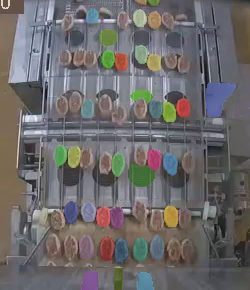

In [94]:
output_mask

# Sparse models

In [ ]:
import numpy as np
import cv2
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import torch
from torchvision import transforms, models
import matplotlib.pyplot as plt

class KNNClickPredictor:
    def __init__(self, feature_extractor='resnet18', n_neighbors=5, sam_checkpoint=None):
        """
        Initialize the KNN Click Predictor
        
        Args:
            feature_extractor: Pre-trained model to extract features (default: 'resnet18')
            n_neighbors: Number of neighbors for KNN (default: 5)
            sam_checkpoint: Path to SAM checkpoint
        """
        # Setup feature extractor
        if feature_extractor == 'resnet18':
            self.model = models.resnet18(pretrained=True)
            # Remove the final classification layer
            self.model = torch.nn.Sequential(*(list(self.model.children())[:-1]))
            self.model.eval()
        else:
            raise ValueError(f"Unsupported feature extractor: {feature_extractor}")
            
        # Setup transform
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                std=[0.229, 0.224, 0.225])
        ])
        
        # Initialize KNN model
        self.knn = NearestNeighbors(n_neighbors=n_neighbors)
        
        # Initialize SAM if checkpoint is provided
        self.sam = None
        self.sam_predictor = None
        if sam_checkpoint:
            self.sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
            self.sam_predictor = SamPredictor(self.sam)
        
        # Storage for training data
        self.image_features = []
        self.click_positions = []
        self.image_paths = []
    
    def extract_features(self, image):
        """Extract features from an image using the pre-trained model"""
        if isinstance(image, str):
            # If image is a file path
            img = Image.open(image).convert('RGB')
        else:
            # If image is already loaded
            img = Image.fromarray(image).convert('RGB')
            
        img_t = self.transform(img)
        
        with torch.no_grad():
            features = self.model(img_t.unsqueeze(0))
            features = features.squeeze().flatten().numpy()
        
        return features
    
    def extract_patch_features(self, image, click_position, patch_size=64):
        """Extract features from a patch around the click position"""
        if isinstance(image, str):
            # If image is a file path
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            # If image is already loaded
            img = image
            
        h, w = img.shape[:2]
        x, y = click_position
        
        # Calculate patch coordinates with boundary checks
        left = max(0, x - patch_size // 2)
        top = max(0, y - patch_size // 2)
        right = min(w, x + patch_size // 2)
        bottom = min(h, y + patch_size // 2)
        
        # Extract patch
        patch = img[top:bottom, left:right]
        
        # Resize if the patch is not square or too small
        if patch.shape[0] < 10 or patch.shape[1] < 10:
            return None  # Skip if patch is too small
            
        # Convert patch to PIL and extract features
        patch_pil = Image.fromarray(patch)
        return self.extract_features(patch_pil)
    
    def add_training_sample(self, image, click_position):
        """Add a training sample (image and click position)"""
        if isinstance(image, str):
            # Store the image path
            self.image_paths.append(image)
            features = self.extract_patch_features(image, click_position)
        else:
            # Store the image itself
            self.image_paths.append(None)
            features = self.extract_patch_features(image, click_position)
        
        if features is not None:
            self.image_features.append(features)
            self.click_positions.append(click_position)
    
    def train(self):
        """Train the KNN model on the collected features"""
        if len(self.image_features) == 0:
            raise ValueError("No training samples added. Use add_training_sample first.")
            
        X = np.array(self.image_features)
        self.knn.fit(X)
        print(f"KNN model trained on {len(X)} samples")
    
    def predict_clicks(self, image, num_clicks=3, min_distance=20):
        """Predict click positions for an image"""
        if isinstance(image, str):
            # If image is a file path
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            # If image is already loaded
            img = image
            
        h, w = img.shape[:2]
        patch_size = 64
        
        # Create a grid of candidate positions
        step = patch_size // 2  # 50% overlap between patches
        candidate_positions = []
        candidate_features = []
        
        for y in range(patch_size//2, h, step):
            for x in range(patch_size//2, w, step):
                # Extract features from patch around (x, y)
                features = self.extract_patch_features(img, (x, y), patch_size)
                if features is not None:
                    candidate_positions.append((x, y))
                    candidate_features.append(features)
        
        if not candidate_features:
            return []
            
        # Find nearest neighbors for each candidate
        distances, indices = self.knn.kneighbors(candidate_features)
        
        # Rank candidates by average distance to their k nearest neighbors
        avg_distances = np.mean(distances, axis=1)
        ranked_indices = np.argsort(avg_distances)
        
        # Select best candidates, ensuring minimum distance between them
        selected_clicks = []
        for idx in ranked_indices:
            pos = candidate_positions[idx]
            
            # Check if this position is far enough from already selected positions
            too_close = False
            for selected_pos in selected_clicks:
                dist = np.sqrt((pos[0] - selected_pos[0])**2 + (pos[1] - selected_pos[1])**2)
                if dist < min_distance:
                    too_close = True
                    break
                    
            if not too_close:
                selected_clicks.append(pos)
                if len(selected_clicks) >= num_clicks:
                    break
        
        return selected_clicks
    
    def segment_with_sam(self, image, click_positions, positive=True):
        """Use SAM to segment the image based on predicted clicks"""
        if self.sam_predictor is None:
            raise ValueError("SAM predictor not initialized. Provide sam_checkpoint.")
            
        if isinstance(image, str):
            # If image is a file path
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            # If image is already loaded
            img = image
            
        # Set the image in SAM predictor
        self.sam_predictor.set_image(img)
        
        # Convert click positions to input points and labels
        input_points = np.array(click_positions)
        input_labels = np.ones(len(click_positions)) if positive else np.zeros(len(click_positions))
        
        # Generate mask predictions
        masks, scores, logits = self.sam_predictor.predict(
            point_coords=input_points,
            point_labels=input_labels,
            multimask_output=True
        )
        
        # Return best mask by score
        best_mask_idx = np.argmax(scores)
        return masks[best_mask_idx]
    
    def visualize_prediction(self, image, click_positions, mask=None):
        """Visualize the image with predicted clicks and optional mask"""
        if isinstance(image, str):
            # If image is a file path
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            # If image is already loaded
            img = image.copy()
            
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        
        # Plot click positions
        for x, y in click_positions:
            plt.plot(x, y, 'ro', markersize=10)
            
        # Plot mask as overlay if provided
        if mask is not None:
            colored_mask = np.zeros_like(img)
            colored_mask[mask > 0] = [0, 0, 255]  # Blue mask
            plt.imshow(colored_mask, alpha=0.5)
            
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
    def evaluate(self, test_images, test_clicks, iou_threshold=0.5):
        """Evaluate the model's performance on test images with ground truth clicks"""
        if self.sam_predictor is None:
            raise ValueError("SAM predictor not initialized. Provide sam_checkpoint.")
            
        ious = []
        for i, (image, true_clicks) in enumerate(zip(test_images, test_clicks)):
            # Predict clicks
            pred_clicks = self.predict_clicks(image)
            
            # Generate masks
            true_mask = self.segment_with_sam(image, true_clicks)
            pred_mask = self.segment_with_sam(image, pred_clicks)
            
            # Calculate IoU
            intersection = np.logical_and(true_mask, pred_mask).sum()
            union = np.logical_or(true_mask, pred_mask).sum()
            iou = intersection / union if union > 0 else 0
            ious.append(iou)
            
            print(f"Image {i+1}: IoU = {iou:.4f}")
            
        avg_iou = np.mean(ious)
        success_rate = np.mean(np.array(ious) > iou_threshold)
        
        print(f"Average IoU: {avg_iou:.4f}")
        print(f"Success Rate (IoU > {iou_threshold}): {success_rate:.4f}")
        
        return avg_iou, success_rate


# Example usage:
if __name__ == "__main__":
    # Initialize the predictor
    predictor = KNNClickPredictor(
        feature_extractor='resnet18',
        n_neighbors=5,
        sam_checkpoint="sam_vit_h_4b8939.pth"  # Path to SAM checkpoint
    )
    
    # Add training samples
    # For example:
    # predictor.add_training_sample("image1.jpg", (100, 150))
    # predictor.add_training_sample("image2.jpg", (200, 300))
    
    # Train the model
    # predictor.train()
    
    # Predict clicks for a new image
    # pred_clicks = predictor.predict_clicks("new_image.jpg")
    
    # Generate segmentation using SAM
    # mask = predictor.segment_with_sam("new_image.jpg", pred_clicks)
    
    # Visualize the results
    # predictor.visualize_prediction("new_image.jpg", pred_clicks, mask)